# DS44000 Homework 1

Chris Dilger

Code available on GitHub: https://github.com/cdilga/DS4400/blob/master/Homework%201.ipynb

--------------------------------------------------------------------------------

## Problem 1


In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cols(data, width = 30):
    """Formats list like objects into columns"""
    return "".join(str(word).ljust(30) for word in data)

                   
# Load the file
housing = pd.read_csv("data/train.csv", 
                      usecols=lambda x: x in ["price",
                                              "bedrooms",
                                              "bathrooms",
                                              "sqft_living",
                                              "sqft_lot",
                                              "floors",
                                              "waterfront",
                                              "view",
                                              "condition",
                                              "grade",
                                              "sqft_above",
                                              "sqft_basement",
                                              "yr_built",
                                              "yr_renovated",
                                              "lat",
                                              "long",
                                              "sqft_living15",
                                              "sqft_lot15"])

housing_test = pd.read_csv("data/test.csv", 
                      usecols=lambda x: x in ["price",
                                              "bedrooms",
                                              "bathrooms",
                                              "sqft_living",
                                              "sqft_lot",
                                              "floors",
                                              "waterfront",
                                              "view",
                                              "condition",
                                              "grade",
                                              "sqft_above",
                                              "sqft_basement",
                                              "yr_built",
                                              "yr_renovated",
                                              "lat",
                                              "long",
                                              "sqft_living15",
                                              "sqft_lot15"])


housing_training_features = housing.copy().drop("price", axis=1)
housing_training_labels = housing.copy().loc[:,"price"]
housing_testing_features = housing_test.copy().drop("price", axis=1)
housing_testing_labels = housing_test.copy().loc[:,"price"]

description = housing.describe().loc[["mean", "std", "min", "max"]]
description = description.T
description['var'] = description['std'].apply(lambda x: x**2)
description


,mean,std,min,max,var
price,520414.834000,339488.477270,80000.0000,3.075000e+06,1.152524e+11
bedrooms,3.349000,0.852012,0.0000,7.000000e+00,7.259249e-01
bathrooms,2.045750,0.721623,0.0000,5.000000e+00,5.207402e-01
sqft_living,2051.196000,887.929222,380.0000,6.070000e+03,7.884183e+05
sqft_lot,14702.085000,28961.030775,649.0000,3.153740e+05,8.387413e+08
floors,1.446500,0.517354,1.0000,3.500000e+00,2.676554e-01
waterfront,0.008000,0.089129,0.0000,1.000000e+00,7.943944e-03
view,0.237000,0.765125,0.0000,4.000000e+00,5.854164e-01
condition,3.464000,0.689332,1.0000,5.000000e+00,4.751792e-01
grade,7.606000,1.160220,4.0000,1.200000e+01,1.346110e+00


In [2]:
def cov(x, y):
    """Calculate covariance given the feature x and response y"""
    total = 0
    x_m = x.mean()
    y_m = y.mean()
    for i in range(len(x)):
        total += (x.loc[i]-x_m)*(y.loc[i]-y_m)
    return total/(len(x)-1)

def cor(x, y):
    """Calculate the correlation coefficient"""
    return cov(x, y)/(x.std()*y.std())

for feature in [x for x in housing if x != "price"]:
    print(cols([feature, 
                cor(housing["price"], housing[feature]),
                housing["price"].corr(housing[feature])
               ]))
    #print()

bedrooms                      0.3070584002104321            0.3070584002104319            
bathrooms                     0.48715729789866974           0.4871572978986769            
sqft_living                   0.7047757101823997            0.7047757101824055            
sqft_lot                      0.14664482983805222           0.14664482983805197           
floors                        0.2399348472639126            0.2399348472639161            
waterfront                    0.31714301382621846           0.3171430138262226            
view                          0.44531642588846515           0.4453164258884609            
condition                     0.07396055390188862           0.07396055390188938           
grade                         0.647349055785599             0.6473490557856066            
sqft_above                    0.5824071469756538            0.5824071469756582            
sqft_basement                 0.3673649191324655            0.36736491913246594           

#### Discussion of Problem 1.a
Suprisingly every feature is positively correlated with price, which is suprising. `yr_built` and `yr_renovated` are weakly correlated, as were `long` (longditude) and `sqft_lot15`. 


## Problem 2 [Linear regression]

### (a) 
Use an existing package to train a linear regression model on the training set. Report the coefficients of the linear regression models and the 3 metrics of interest: MSE, RSS, and $R^2$.


In [3]:
#use scikit.learn

#Get MSE RSS and R^2

#All predictors predicting 'price' label


from sklearn import linear_model
from IPython.display import display, Math
from sklearn import metrics

def lib_metrics(r, features, labels):
    display(Math("R^2 = {0:.4f}".format(r.score(features, labels))))
    mse = metrics.mean_squared_error(labels, r.predict(features))
    display(Math("MSE={0:.0f}".format(mse)))

    rss = mse*len(labels)
    display(Math("RSS={0:.0f}".format(rss)))


reg = linear_model.LinearRegression()
reg.fit(housing_training_features, housing_training_labels)

lib_metrics(reg, housing_training_features, housing_training_labels)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### (b) 
Perform feature standardization so that each feature has mean 0 and variance of 1. Train again a linear regression model on the training data. Compare the results with the previous models in terms of the metrics of interest: MSE, RSS, and $R^2$.

### (c)
Evaluate both models on the testing set. Report the same metrics (MSE, RSE, and $R^2$) on the testing set.


In [34]:
# We should be able to pass this a dataset, then it normalises it. Will also expose functions to normalise further bits
# It seems that "unstandardisation" isn't really a thing
def standardize(features):
    #iterate through the features
    features = np.array(features)
    
    #Nice function which copies the shape of features into a new array
    scaled = np.empty_like(features)
    for i in range(len(features.T)):
        mu = features[:,i].mean()
        sd = features[:,i].std()

        for j in range(len(features[:,i])):
            scaled[j,i] = (features[j,i] - mu)/sd
            
    return scaled

stdreg = linear_model.LinearRegression(normalize=False)
stdfeatures = standardize(housing_training_features)
stdreg.fit(stdfeatures, housing_training_labels)

lib_metrics(stdreg, stdfeatures, housing_training_labels)

print("Without Scaling R^2: ", reg.score(housing_training_features, housing_training_labels))
print("With Scaling R^2: ", stdreg.score(stdfeatures, housing_training_labels))
labs = [label for label in housing_training_features]

stdcomp = pd.DataFrame({"Standardized" : pd.Series(stdreg.coef_, index=labs), 
              "Unstandardized" : pd.Series(reg.coef_, index=labs)})
stdcomp.reindex(stdcomp.loc[:,"Standardized"].abs().sort_values(inplace=False).index)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Without Scaling R^2:  0.7265334318706016
With Scaling R^2:  0.7265334318706018


,Standardized,Unstandardized
long,-1035.203084,-7424.027121
floors,8043.720837,15555.580988
sqft_lot,10881.868446,0.375930
bedrooms,-12521.961869,-14704.280497
sqft_lot15,-12930.090978,-0.515528
condition,12964.269364,18816.402756
yr_renovated,17271.379530,43.682942
bathrooms,18527.632513,25687.783987
sqft_basement,27137.032468,41.073715
sqft_living15,45577.657813,68.015792


Interestingly the $R^2$ value, MSE and RSS have remained the same whether or not the data has been normalised. We would expect a difference in convergence time however, when we construct the gradient descent model in Problem 4

### (d) 
Interpret the results in your own words. Which features contribute mostly to the linear regression model? Is the model fitting the data well? How large is the model error?

We see that the features with the largest theta values contribute the most to the linear regression. Results were ordered by their absolute value to include negative effects. Several results are unexpected, especially the negative correlation between bedrooms and price. A basic graph below demonstrates this

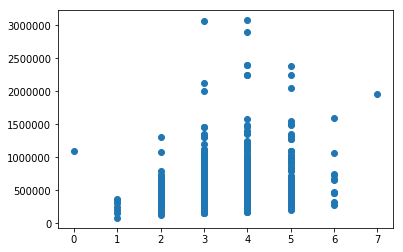

In [5]:
#plot housing.loc[:,"bedrooms"],housing.loc[:,"price"]
import matplotlib.pyplot as plt
display(plt.scatter(housing.loc[:,"bedrooms"], housing.loc[:,"price"]))

There seems to be a positive correlation before we account for all other features

The model is fitting the data reasonably well, $R^2$ shows that 72.65% of the variation in the data can be explained by the multiple linear model.



## Problem 3 [Closed form solution of linear regression]


In this problem, you will implement your own linear regression model, using the closed-form solution we derived in class. You will also compare your model with the one trained with the package.


1. Implement simple linear regression and train a model for one feature (sqft\_living) using the training set. Write code to predict a response for a new single-dimensional data point in the testing set.




In [6]:
class Lin:
    """Fit a linear model to some datapoints in 2 dimensions"""
    def __init__(self):
        self.theta = np.ones(2)
        self._rss = 0
        self.n = 0
        self._tss = 0
        
    def fit(self, X, y): 
        """Takes X Feature numpy 1d array, y Label numpy 1d array"""
        
        self.n = X.shape[0]
        
        x_m = np.mean(X)
        y_m = np.mean(y)
        
        # for each training data point in x, and corresponding label y
        # calculate 2 separate values, using this formula and a mean of each
        a = b = 0
        for i in range(self.n):
            diffx = X[i]-x_m
            a += (diffx)*(y[i]-y_m)
            b += (diffx)**2
            
        self.theta[1] = a/b
        self.theta[0] = y_m-self.theta[1]*x_m
        
        for i in range(self.n):
            self._rss += (y[i] - self.predict(X[i]))**2
            self._tss += (y[i] - y_m)**2
        
        return self
    
    def rss(self):
        return self._rss
    
    def mse(self):
        return (self._rss / self.n)
    
    def r2(self):
        return 1-(self._rss/self._tss)
    
    def coef(self):
        """Return the coefficients vector"""
        return self.theta
    
    def predict(self, x):
        return self.theta[0] + x*self.theta[1]

mod = Lin()

housing_training_features
mod.fit(housing.loc[:,'sqft_living'], housing.loc[:,'price'])

thetas = mod.coef()
display(Math("\\theta_0 = {0:.4f}, \\theta_1 = {1:.4f}".format(thetas[0], thetas[1])))

predict = housing_test.loc[1,'sqft_living']
model = mod.predict(predict)
actual = housing_test.loc[1,'price']

display(Math("\\text{Predicted}=" + 
             str(round(model, 2)) + 
             " \\space ft^2\\\\ \\text{Actual}= " + 
             str(round(actual, 2)) + 
             "\\space ft^2"
            ))

display(Math("RSS = {:.4f} \\\\ MSE = {:.4f} \\\\ R^2 = {:.4f}".format(mod.rss(), mod.mse(), mod.r2())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

2. Implement multiple linear regression using matrix operations and train a model on the training set. Write code to predict a response for a new multi-dimensional data point in the testing set.



In [7]:
class Multi_lin:
    # has a coeficients property
    # has a fit method
    
    def __init__(self):
        self.theta = np.ones((1,))
        self._rss = 0
        self.n = 0
        self._tss = 0
        
    def fit(self, X, y): 
        #We need to add a column of ones to x to allow the intercept to work
        
        self.n = X.shape[0]
        intercept = np.ones(len(X))
 
        X = np.column_stack((intercept, X))
        
        y_m = y.mean()
        #use theta
        self.theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

        self._calc_rss(X, y, y_m)
        return self
    
    def coef(self):
        return self.theta[1:]
    
    def intercept(self):
        return self.theta[0]
    
    def _calc_rss(self, X, y, y_m):
        #we have to strip off all of the leading 1's
        for i in range(self.n):
            self._rss += (y[i] - self.predict(X[i,1:]))**2
            self._tss += (y[i] - y_m)**2
            
    def mse(self):
        return (self._rss / self.n)
        
    def rss(self):
        return self._rss
    
    def r2(self):
        return 1-(self._rss/self._tss)
    
    def predict(self, x):
        return self.theta.T.dot(np.insert(x, 0, 1))
    
    
mult = Multi_lin()

# Prediction of price using new multidimensional data point

mult.fit(np.array(housing_training_features), housing_training_labels)
model = mult.predict(np.array(housing_testing_features.loc[0,:]))
actual = housing_testing_labels[0]

display(Math("\\text{Predicted}=" + 
             str(round(model, 2)) + 
             " \\space ft^2\\\\ \\text{Actual}= " + 
             str(round(actual, 2)) + 
             "\\space ft^2"
            ))

display(Math("RSS = {0} \\\\ MSE = {1} \\\\ R^2 = {2:.4f}".format(mult.rss(), mult.mse() , mult.r2())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

3. Compare the models given by your implementation with those trained in Problem 2 by the R or Python packages. Report the MSE, RSE, and $R^2$ metrics for the models you implemented. Compare the coefficients output by your model with the ones computed by the package.


In [16]:
#Linear model trained:
print("Simple linear regression")
display(Math("RSS = {:.4f} \\\\ MSE = {:.4f} \\\\ R^2 = {:.4f}".format(mod.rss(), mod.mse(), mod.r2())))

#libaray simple linear regression
simplereg = linear_model.LinearRegression()
features = np.array(housing_training_features.loc[:,"sqft_living"])[:, np.newaxis]
labels = np.array(housing_training_labels)[:, np.newaxis]
simplereg.fit(features, housing_training_labels)


print("Simple linear regression library:")
display(Math("R^2 = {0:.4f}".format(simplereg.score(features, housing_training_labels))))
simpleregmse = metrics.mean_squared_error(labels, simplereg.predict(features))
display(Math("MSE={0:.0f}".format(simpleregmse)))

simpleregrss = simpleregmse*len(housing_training_labels)
display(Math("RSS={0:.0f}".format(simpleregrss)))

#Multiple linear model trained:
print("Multiple linear regression: ")
display(Math("RSS = {0:.4f} \\\\ MSE = {1:.4f} \\\\ R^2 = {2:.4f}".format(mult.rss(), mult.mse(), mult.r2())))

print("Multiple linear regression library")
lib_metrics(reg, housing_training_features, housing_training_labels)

output = pd.DataFrame()
# This mult.coef is 17 long. This is equal to the number of predictors
#however we also need an intercept --- Where is the intercept?
output["multiple_code"] = np.insert(mult.coef(), 0, mult.intercept())

output["multiple_library"] = np.insert(reg.coef_, 0, reg.intercept_)

display(output)

Simple linear regression


<IPython.core.display.Math object>

Simple linear regression library:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Multiple linear regression: 


<IPython.core.display.Math object>

Multiple linear regression library


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,multiple_code,multiple_library
0,-470.805669,-2.308890e+07
1,-15737.805001,-1.470428e+04
2,26264.450129,2.568778e+04
3,84.504985,8.308421e+01
4,0.350240,3.759298e-01
5,23344.816106,1.555558e+04
6,725344.412572,7.155352e+05
7,65223.592066,6.302790e+04
8,16620.915477,1.881640e+04
9,85550.566113,7.953460e+04


## Problem 4 [Gradient Descent]

In this problem, you will implement your own gradient descent algorithm and apply it to linear regression. Use the scaled dataset.

(a) Write code for gradient descent for training linear regression using the algorithm from class.

(b) Vary the value of the learning rate (5 different values) and the number of iterations (5 different values)) and report the value of $\theta$ for each of the 25 combinations, as well as the MSE metric on the training set. Report the MSE on the testing set.

(c) Tune your implementation to obtain results close to those obtained with the package. Write some observations: How does the objective change with different learning rates; how many iterations are needed, etc.

(d) **Extra credit - 10 points** You will get extra credit if your GD implementation of linear regression achieves MSE very close to the least-square solution given by the package.

(e) **Extra credit - 10 points** You will extra credit if your GD implementation of linear regression can run on the entire ''kc\_house\_data.csv'' dataset efficiently. Report the running time of your training algorithm for the entire dataset and compare that with the running time of the package.


In [120]:
class Grad_lin:
    # has a coeficients property
    # has a fit method

    def __init__(self, threshold, alpha, limit=1000):
        self._rss = 0
        self.n = 0
        self._tss = 0
        self._alpha = alpha
        self.threshold = threshold
        self._limit = limit

    def get_alpha(self):
        return self._alpha

    def derivative(self, X, y, j):
        # TODO replace with NumPy optimised iterator
        d = 0
        for i in range(len(X)):
            # Good chance this X is wrong here:
            # If there are errors on this line, make sure you're getting the ROW i
            d += (self._theta.dot(X[i]) - y[i])*X[i, j]
        ret = (d*2)/len(X)
        return ret

    def h(self, x, theta):
        x = np.array([x]).T
        return theta.T.dot(x)

    def cost(self, X, y, theta):
        return np.sum(np.power(X.dot(theta) - y, 2))/len(X)

    def fit(self, X, y):

        intercept = np.ones(len(X))
        limit = self._limit

        X = np.column_stack((intercept, X))
        dt = self.threshold + 1
        y = np.array([y]).T
        self.n = len(X)
        n = 0
        last_cost = 0
        self._theta = np.zeros([X.shape[1], 1])

        # This is really hacky
        self._old_theta = self._theta + 1
        self._cost = np.zeros((limit, 1))

        # while not converged
        while ((np.linalg.norm(self._theta - self._old_theta) > self.threshold) and (n < limit)):
            self._old_theta = self._theta.copy()
            for j in range(len(self._theta)):
                diff = 0
                #here we try to use matrix operations where possible to make use of numpy optimisations
                hmatrix = X.dot(self._old_theta)
                diff = np.sum(np.multiply((hmatrix - y), X[:, j]))
                self._theta[j] = self._old_theta[j]-self._alpha*diff/len(X)
            self._cost[n, 0] = self.cost(X, y, self._theta)
            last_cost = self._cost[n-1, 0]
            #print(self._cost[n, 0], end = ",")
            n += 1
        return self

    def coef(self):
        return self._theta[1:]

    def intercept(self):
        return self._theta[0]

    def rss(self, X, y):
        """Function assumes no leading ones"""
        rss = 0
        for i in range(len(X)):
            rss += (y[i] - self.predict(X[i, :]))**2
        return rss

    def tss(self, X, y):
        """Function assumes no leading ones"""
        tss = 0
        for i in range(len(X)):
            tss += (y[i] - y.mean())**2
        return tss

    def mse(self, X, y):
        """Function assumes no leading ones"""
        return (self.rss(X, y) / len(X))

    def r2(self, X, y):
        return 1-(self.rss(X, y)/self.tss(X, y))

    def predict(self, x):
        """Takes a list of features for a single point, not including a leading 1"""
        return self._theta.T.dot(np.insert(np.array(x), 0, 1))


print("Running")

X = standardize(housing_training_features)
y = housing_training_labels

# Create a big table

thetatable = pd.DataFrame()
alpha = 0.00005
for i in range(5):
    for j in range(5):
        lim = (j+1)*25
        gradmod = Grad_lin(0.0001, alpha*2, lim)
        gradmod.fit(X, y)
        thetatable[i, j] = np.insert(gradmod.coef(), 0, gradmod.intercept())
        msetable = gradmod.mse(X, y)

display(thetatable)
#lines = bigtable.plot.line()

gradmod = Grad_lin(0.0001, 0.00005, 100)
gradmod.fit(X, y)
print("RSS of training: ", gradmod.rss(X, y))
print("R^2 of training: ", gradmod.r2(X, y))
print("MSE of training: ", gradmod.mse(X, y))

print("MSE of test: ", gradmod.mse(standardize(housing_testing_features), housing_testing_labels))


Running


,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)",...,"(3, 0)","(3, 1)","(3, 2)","(3, 3)","(3, 4)","(4, 0)","(4, 1)","(4, 2)","(4, 3)","(4, 4)"
0,1.156251e+05,2.055607e+05,2.755146e+05,3.299262e+05,3.722487e+05,1.156251e+05,2.055607e+05,2.755146e+05,3.299262e+05,3.722487e+05,...,1.156251e+05,2.055607e+05,2.755146e+05,3.299262e+05,3.722487e+05,1.156251e+05,2.055607e+05,2.755146e+05,3.299262e+05,3.722487e+05
1,-2.652948e-11,-4.712960e-11,-6.316745e-11,-7.564737e-11,-8.534061e-11,-2.652948e-11,-4.712960e-11,-6.316745e-11,-7.564737e-11,-8.534061e-11,...,-2.652948e-11,-4.712960e-11,-6.316745e-11,-7.564737e-11,-8.534061e-11,-2.652948e-11,-4.712960e-11,-6.316745e-11,-7.564737e-11,-8.534061e-11
2,8.106073e-12,1.438429e-11,1.926894e-11,2.309931e-11,2.609025e-11,8.106073e-12,1.438429e-11,1.926894e-11,2.309931e-11,2.609025e-11,...,8.106073e-12,1.438429e-11,1.926894e-11,2.309931e-11,2.609025e-11,8.106073e-12,1.438429e-11,1.926894e-11,2.309931e-11,2.609025e-11
3,1.105025e-11,1.963967e-11,2.632662e-11,3.152202e-11,3.557273e-11,1.105025e-11,1.963967e-11,2.632662e-11,3.152202e-11,3.557273e-11,...,1.105025e-11,1.963967e-11,2.632662e-11,3.152202e-11,3.557273e-11,1.105025e-11,1.963967e-11,2.632662e-11,3.152202e-11,3.557273e-11
4,4.133934e-12,7.346247e-12,9.846990e-12,1.179033e-11,1.330736e-11,4.133934e-12,7.346247e-12,9.846990e-12,1.179033e-11,1.330736e-11,...,4.133934e-12,7.346247e-12,9.846990e-12,1.179033e-11,1.330736e-11,4.133934e-12,7.346247e-12,9.846990e-12,1.179033e-11,1.330736e-11
5,2.791923e-11,4.965393e-11,6.652314e-11,7.965457e-11,8.985439e-11,2.791923e-11,4.965393e-11,6.652314e-11,7.965457e-11,8.985439e-11,...,2.791923e-11,4.965393e-11,6.652314e-11,7.965457e-11,8.985439e-11,2.791923e-11,4.965393e-11,6.652314e-11,7.965457e-11,8.985439e-11
6,3.911601e-13,6.986363e-13,9.333872e-13,1.115161e-12,1.286851e-12,3.911601e-13,6.986363e-13,9.333872e-13,1.115161e-12,1.286851e-12,...,3.911601e-13,6.986363e-13,9.333872e-13,1.115161e-12,1.286851e-12,3.911601e-13,6.986363e-13,9.333872e-13,1.115161e-12,1.286851e-12
7,1.168265e-12,2.102960e-12,2.845087e-12,3.409722e-12,3.868910e-12,1.168265e-12,2.102960e-12,2.845087e-12,3.409722e-12,3.868910e-12,...,1.168265e-12,2.102960e-12,2.845087e-12,3.409722e-12,3.868910e-12,1.168265e-12,2.102960e-12,2.845087e-12,3.409722e-12,3.868910e-12
8,9.455376e-12,1.681003e-11,2.259167e-11,2.709936e-11,3.053029e-11,9.455376e-12,1.681003e-11,2.259167e-11,2.709936e-11,3.053029e-11,...,9.455376e-12,1.681003e-11,2.259167e-11,2.709936e-11,3.053029e-11,9.455376e-12,1.681003e-11,2.259167e-11,2.709936e-11,3.053029e-11
9,8.822633e-12,1.568641e-11,2.103760e-11,2.520139e-11,2.845774e-11,8.822633e-12,1.568641e-11,2.103760e-11,2.520139e-11,2.845774e-11,...,8.822633e-12,1.568641e-11,2.103760e-11,2.520139e-11,2.845774e-11,8.822633e-12,1.568641e-11,2.103760e-11,2.520139e-11,2.845774e-11


RSS of training:  [1.15146667e+14]
R^2 of training:  [-8.24526897e-05]
MSE of training:  [1.15146667e+11]
MSE of test:  [1.67319523e+11]


#### Problem 4 Discussion

Since $\theta$ is a large matrix, it seems that the value of visualisaing the value of $\theta$ for 25 combinations of $\alpha$ and the number of iterations will show little. Instead, a line graph can succinctly visualise this data for each of the parameters. This decision was made because a 450 element table seems uninterpretable. 


##### Comparison with the package


Text(0.5,1,'Cost function for alpha= 0.00005')

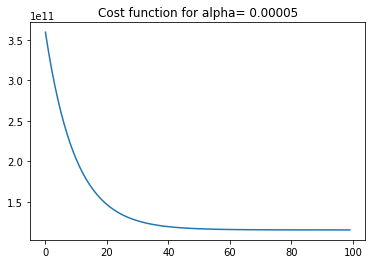

In [140]:
#TODO Visualise the learning rate

plt.plot(gradmod._cost[:,0])
plt.title("Cost function for alpha= 0.00005")
#TODO Compare this gradient descent to the package

clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X, y)

#DO R^2 and MSE to compare



Here we see that around 100 iterations drastically reduces the cost funciton. Running for more than 100 provides a very slight improvement from this point. 

We see that with learning rates above about 

## Problem 5 [Ridge Regression]

PDF Proof can be found on the local file system [here](./Derivation_of_Ridge_Regression.pdf) or though [GitHub](https://github.com/cdilga/DS4400/blob/master/DS4400_HW1/Derivation_of_Ridge_Regression.pdf)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,MSE,RSS,R^2
0.0,6.372536e+10,6.372536e+13,0.723263
0.5,9.560907e+10,9.560907e+13,0.723202
1.0,1.275492e+11,1.275492e+14,0.723049
1.5,1.595678e+11,1.595678e+14,0.722821
2.0,1.916792e+11,1.916792e+14,0.722535
2.5,2.238929e+11,2.238929e+14,0.722204
3.0,2.562145e+11,2.562145e+14,0.721838
3.5,2.886472e+11,2.886472e+14,0.721446
4.0,3.211923e+11,3.211923e+14,0.721035
4.5,3.538501e+11,3.538501e+14,0.720610


Text(0.5,1,'MSE by Lambda for Ridge Regression')

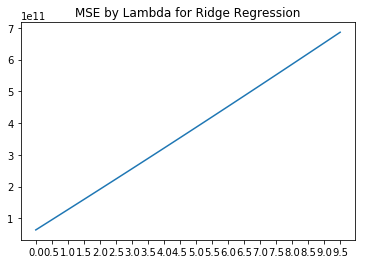

In [135]:
class Ridge_reg:
    # has a coeficients property
    # has a fit method
    
    def __init__(self):
        self.theta = np.ones((1,))
        self._rss = 0
        self.n = 0
        self._tss = 0
        
    def fit(self, X, y, lda): 
        #We need to add a column of ones to x to allow the intercept to work
        
        self.n = X.shape[0]
        intercept = np.ones(len(X))
 
        X = np.column_stack((intercept, X))
        
        y_m = y.mean()
        #use theta
        self.theta = np.linalg.pinv(X.T.dot(X) + lda * np.identity(X.shape[1])).dot(X.T).dot(y)

        self._calc_rss(X, y, y_m)
        return self
    
    def coef(self):
        return self.theta[1:]
    
    def intercept(self):
        return self.theta[0]
    
    def _calc_rss(self, X, y, y_m):
        #we have to strip off all of the leading 1's
        for i in range(self.n):
            self._rss += (y[i] - self.predict(X[i,1:]))**2
            self._tss += (y[i] - y_m)**2
            
    def mse(self):
        return (self._rss / self.n)
        
    def rss(self):
        return self._rss
    
    def r2(self):
        return 1-(self._rss/self._tss)
    
    def predict(self, x):
        return self.theta.T.dot(np.insert(x, 0, 1))
    
    
ridge = Ridge_reg()

# Prediction of price using new multidimensional data point

ridge.fit(np.array(housing_training_features), housing_training_labels, 0)
model = ridge.predict(np.array(housing_testing_features.loc[0,:]))
actual = housing_testing_labels[0]

display(Math("\\text{Predicted}=" + 
             str(round(model, 2)) + 
             " \\space ft^2\\\\ \\text{Actual}= " + 
             str(round(actual, 2)) + 
             "\\space ft^2"
            ))

display(Math("RSS = {0} \\\\ MSE = {1} \\\\ R^2 = {2:.4f}".format(ridge.rss(), ridge.mse(), ridge.r2())))

result = pd.DataFrame()
for i in range(0, 100, 5):
    lda = i/10
    ridge.fit(np.array(housing_training_features), housing_training_labels, lda)
    result.loc[str(lda), "MSE"] = ridge.mse()
    result.loc[str(lda), "RSS"] = ridge.rss()
    result.loc[str(lda), "R^2"] = ridge.r2()
    
    
display(result)

plt.plot(result.loc[:,"MSE"])
plt.title("MSE by Lambda for Ridge Regression")


It is very clear that the effect of $\lambda$ is steadily negative